In [55]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearnex import patch_sklearn, config_context

import pickle

In [ ]:
patch_sklearn()

The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [56]:
DIABETIC_DATA = "../data/diabetic_data.csv"

In [57]:
df = pd.read_csv(DIABETIC_DATA)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [58]:
df.head(10).T # holy shit, i've never seen this, it's really chaotic evil

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


so fucking many ? instead of NA

In [59]:
df.replace("?", pd.NA, inplace=True)

In [60]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [61]:
df.drop(columns=["max_glu_serum", "A1Cresult", "weight", "payer_code", "medical_specialty"], inplace=True) # actually not needed since we will use pca
df.isnull().sum()

encounter_id                   0
patient_nbr                    0
race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [ ]:
for col in ["diag_1", "diag_2", "diag_3"]:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)

df["race"].fillna("Unknown", inplace=True)
# this cell gives warning but i don't care rn

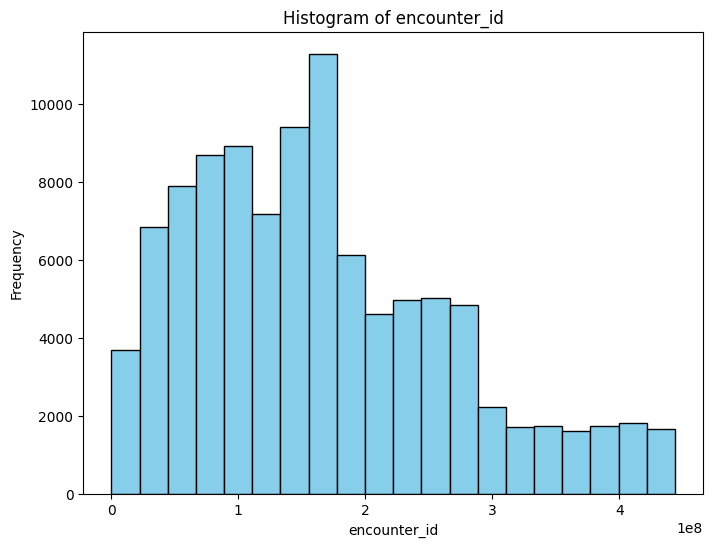

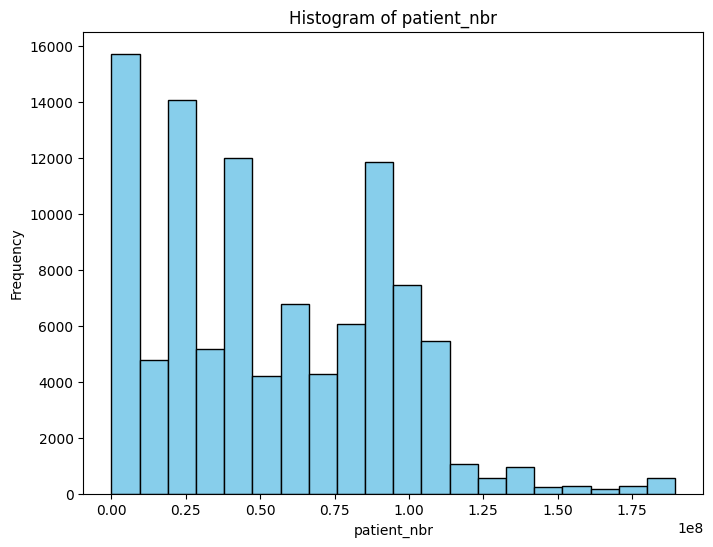

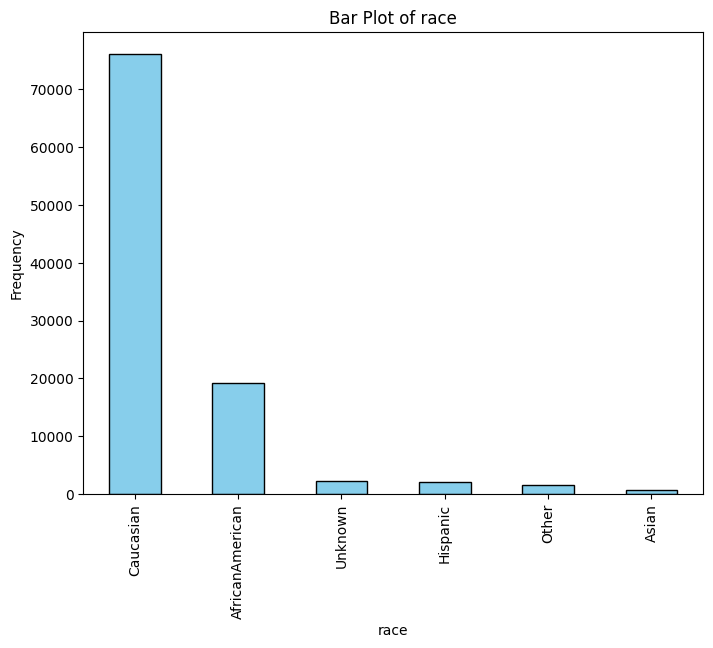

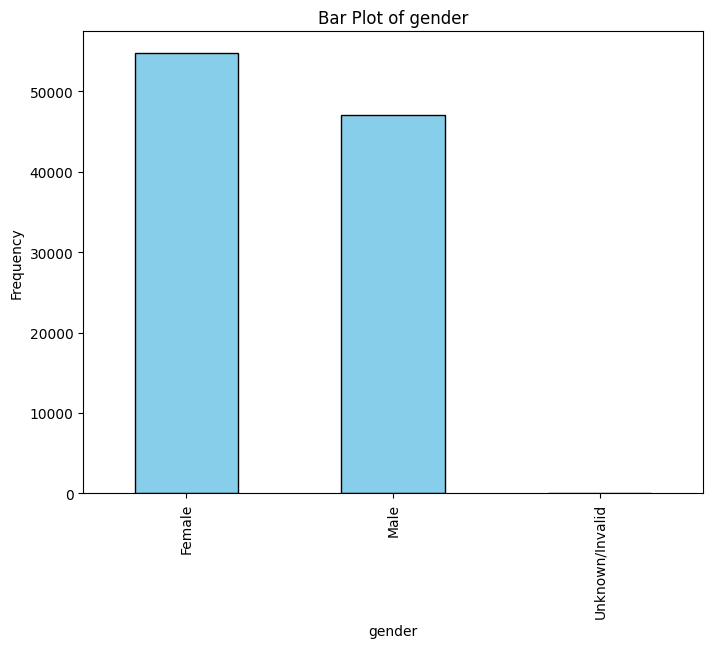

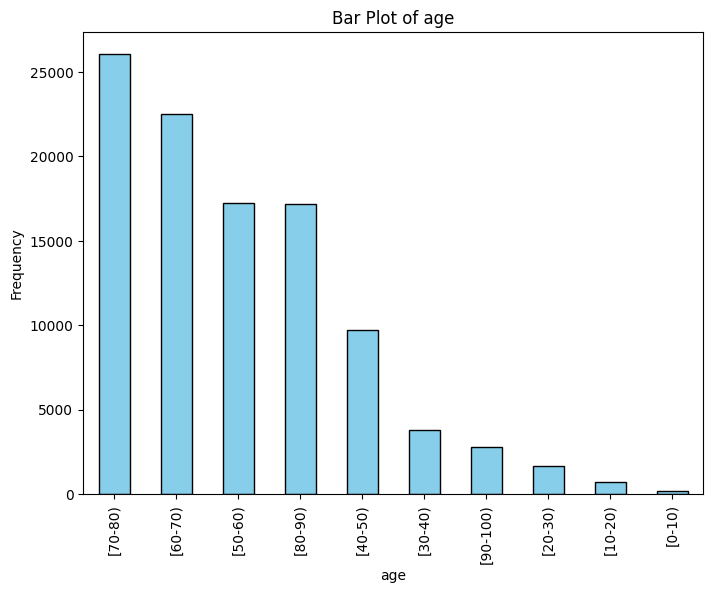

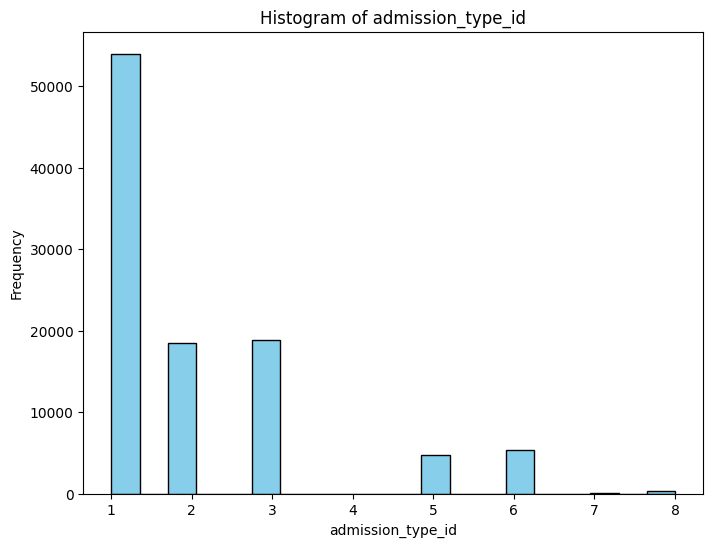

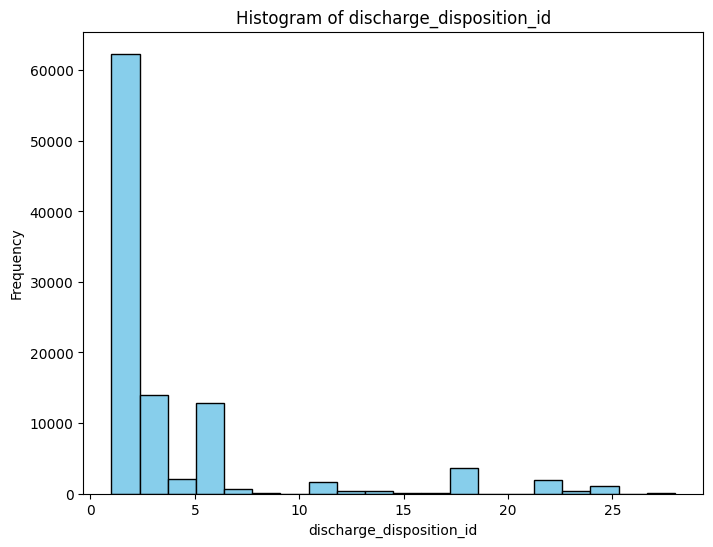

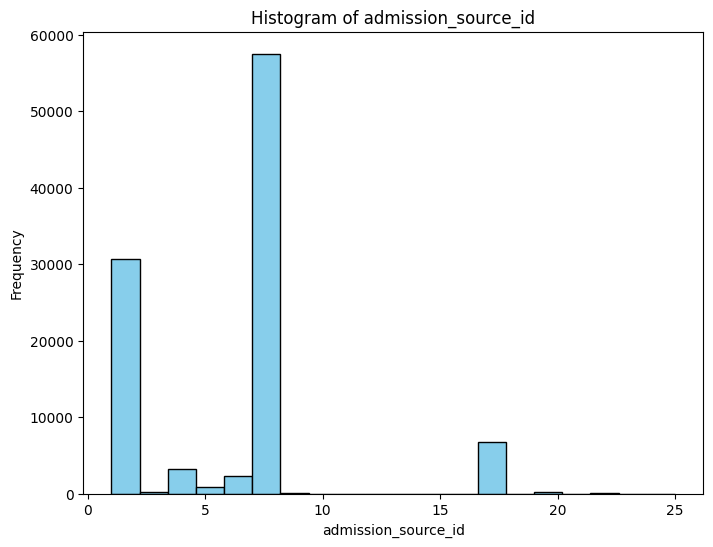

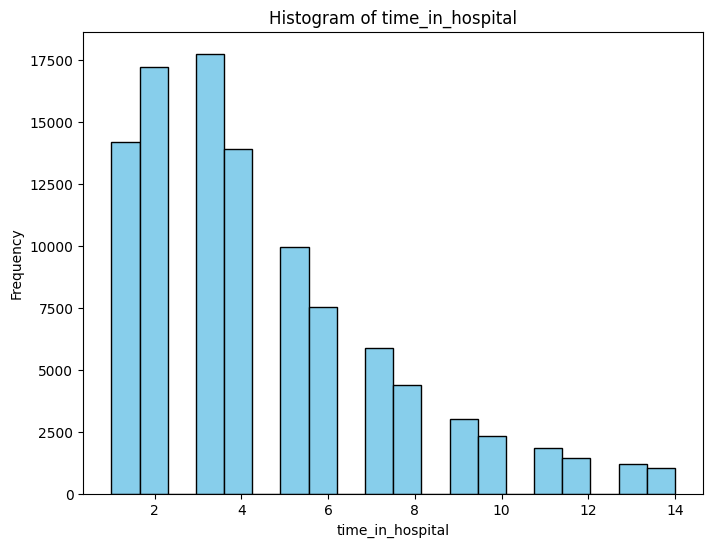

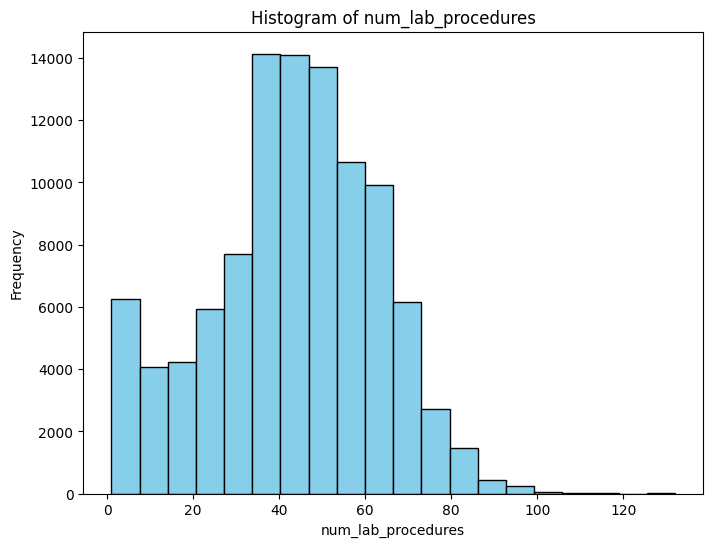

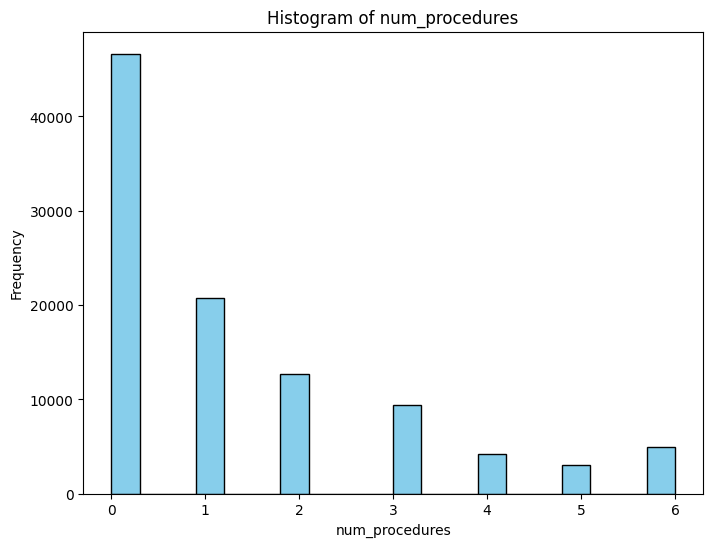

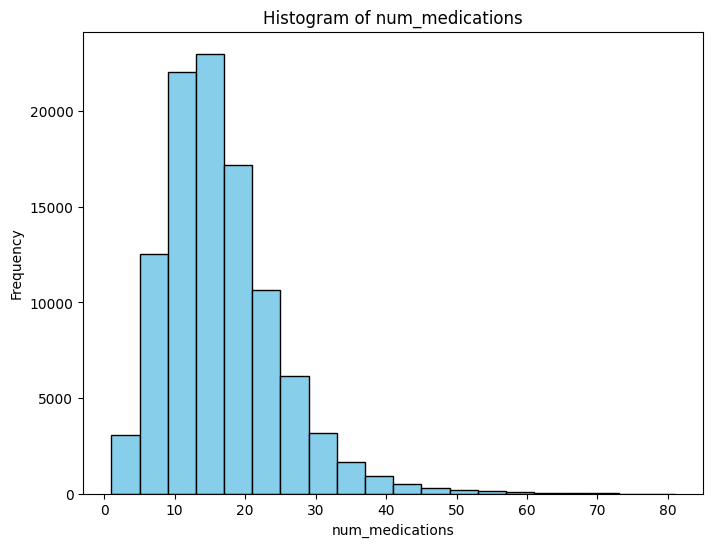

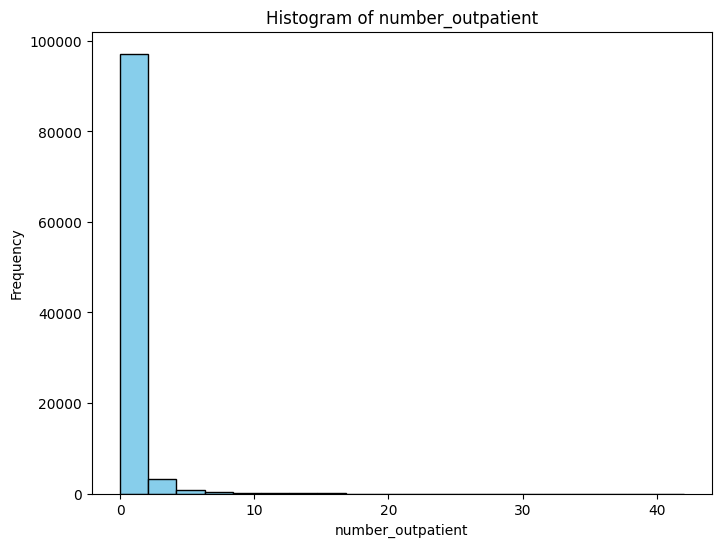

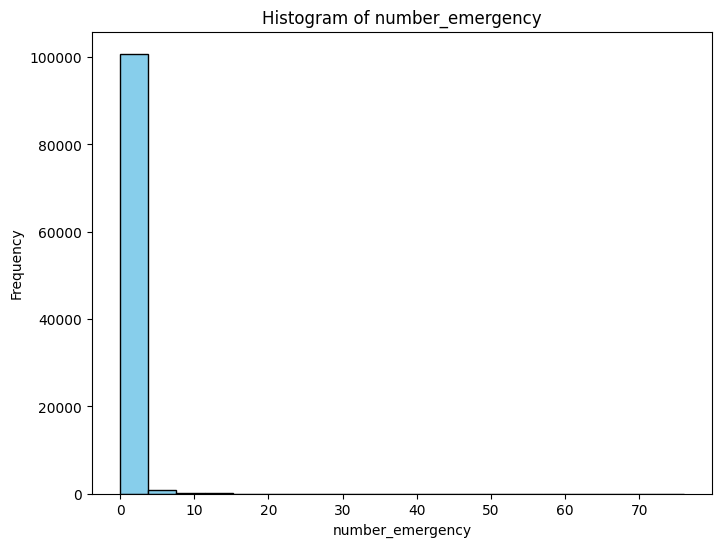

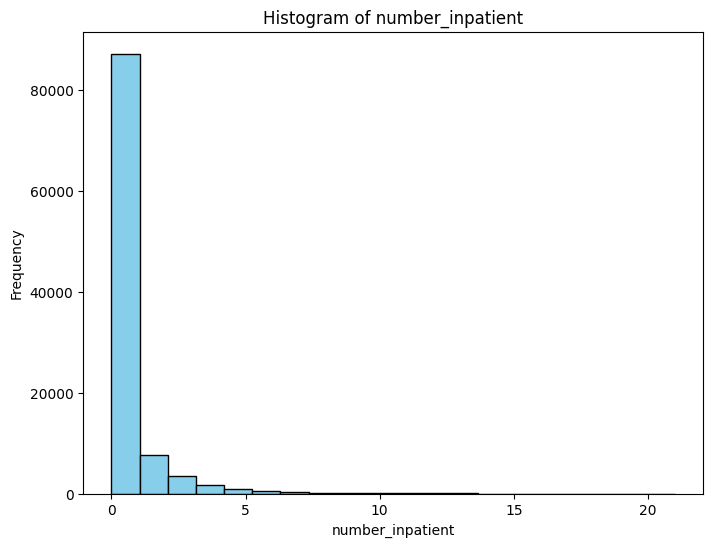

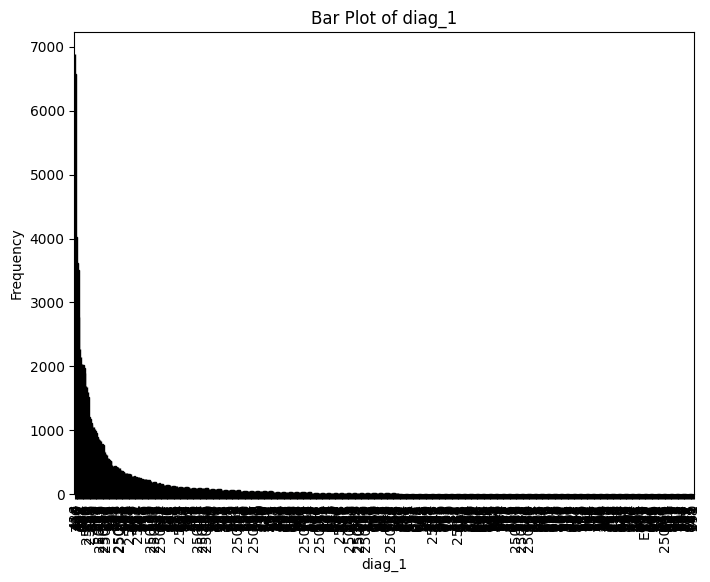

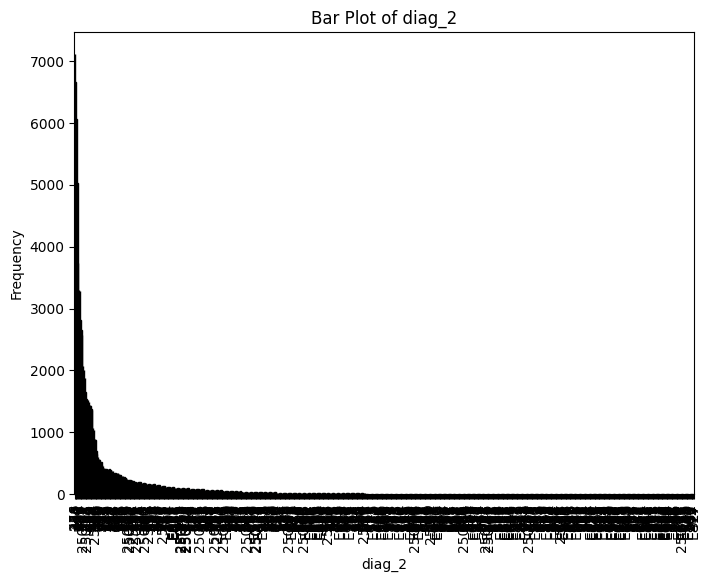

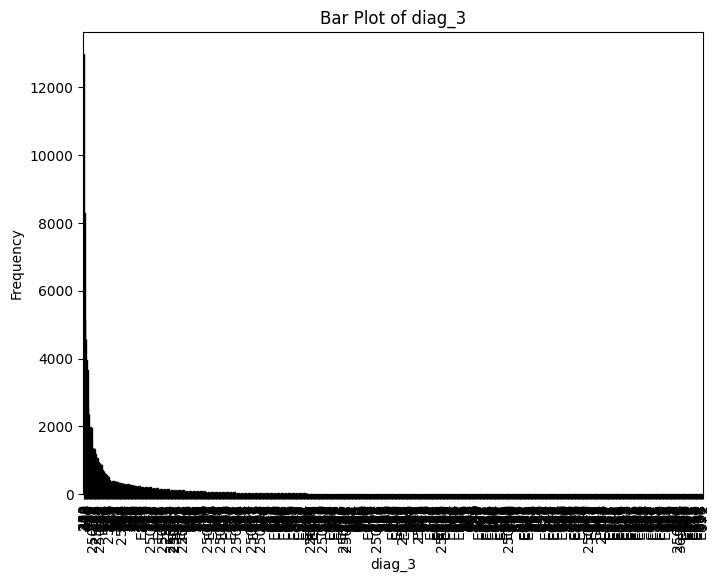

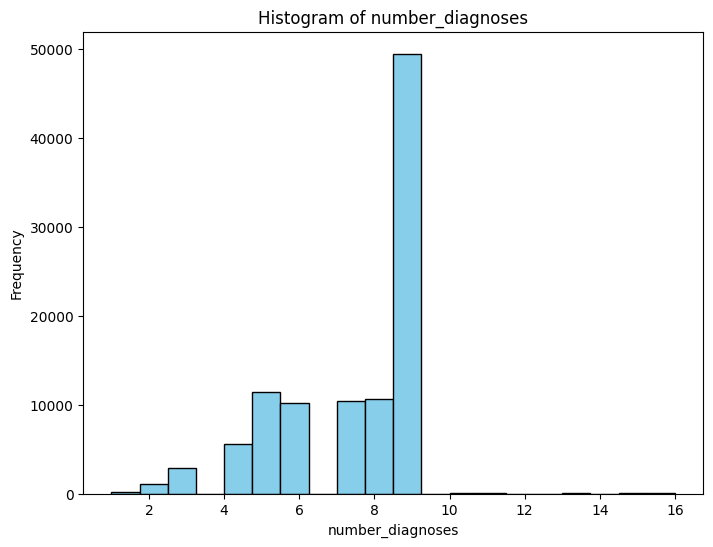

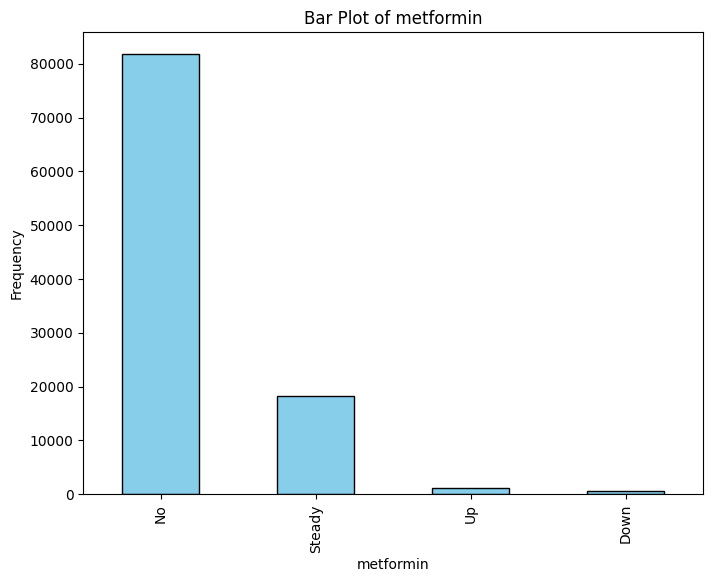

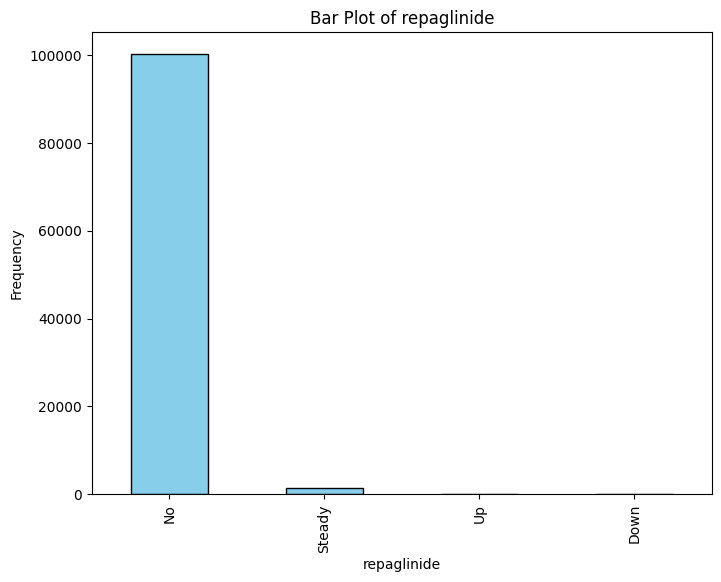

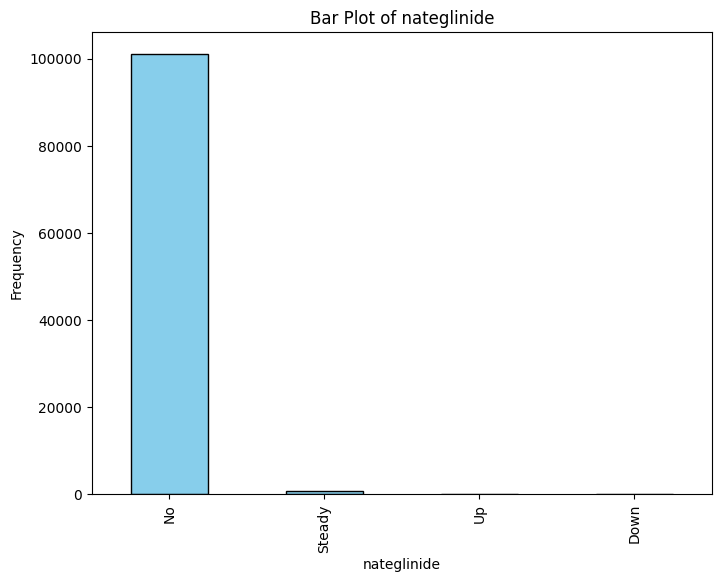

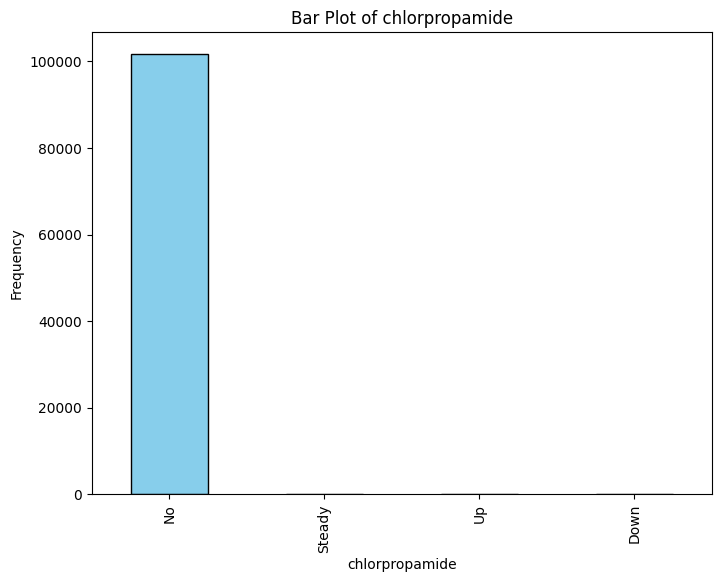

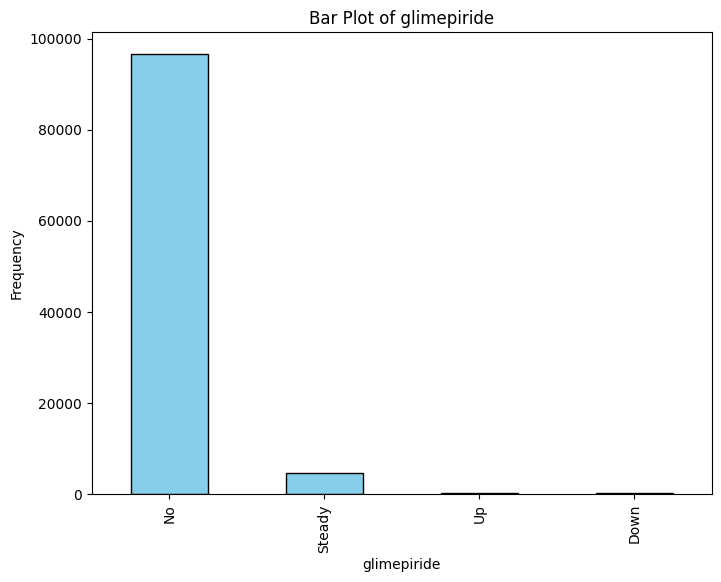

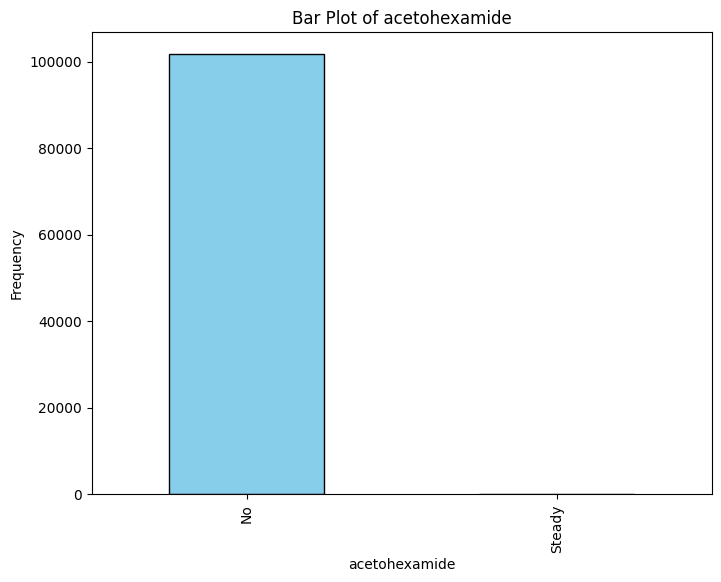

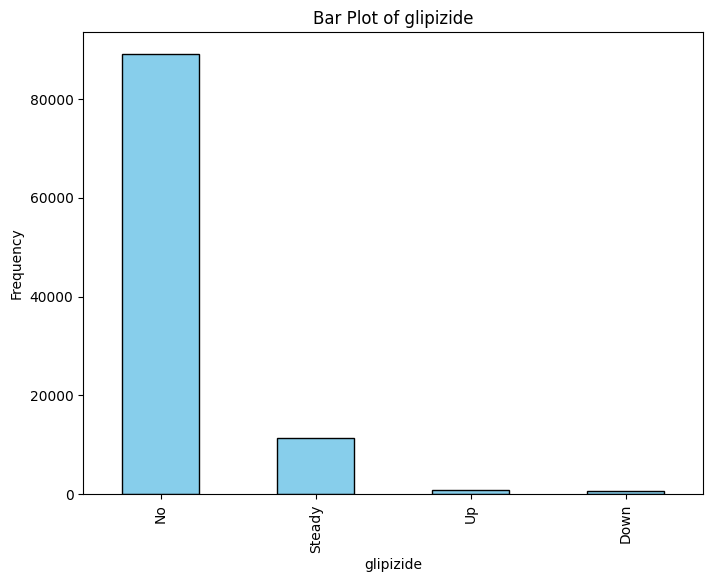

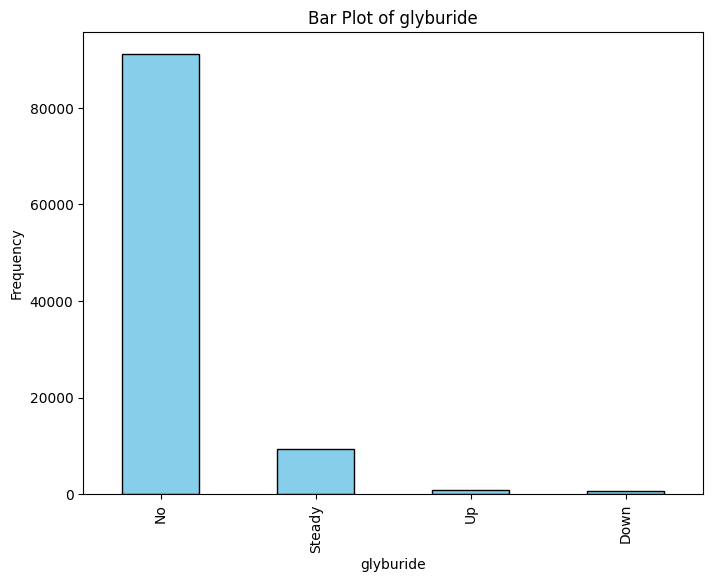

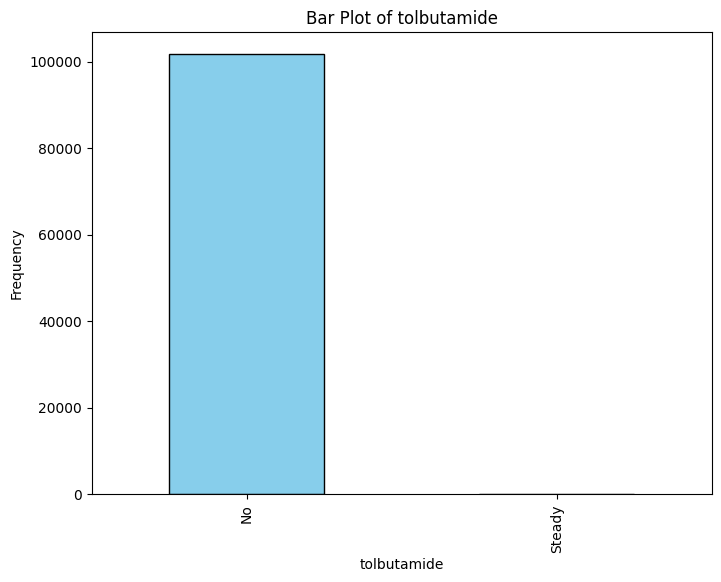

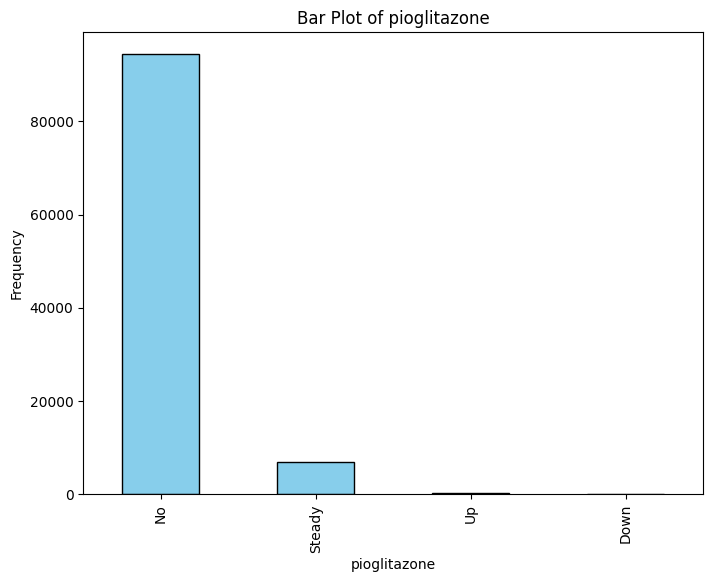

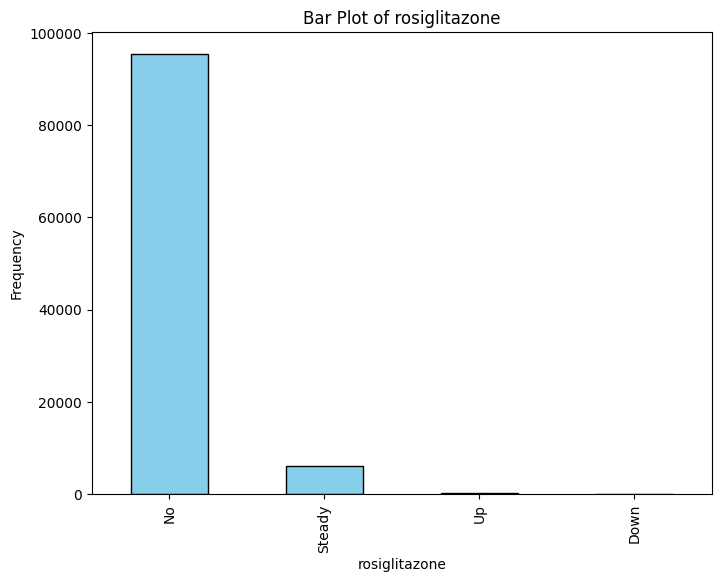

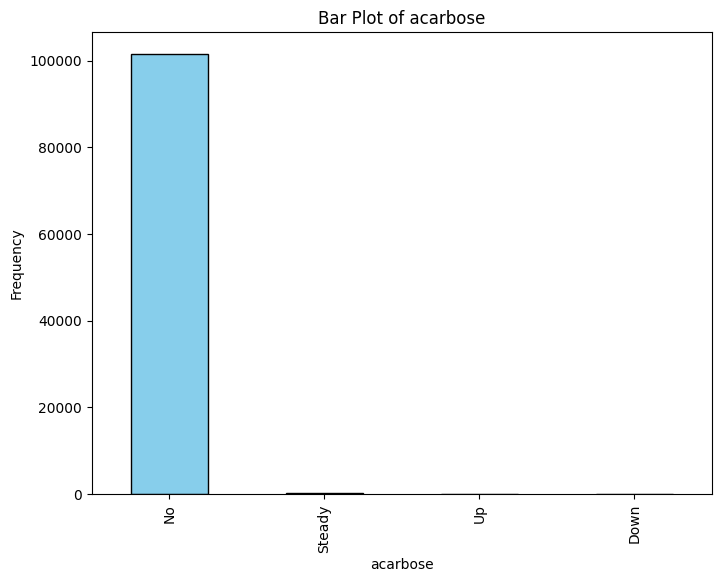

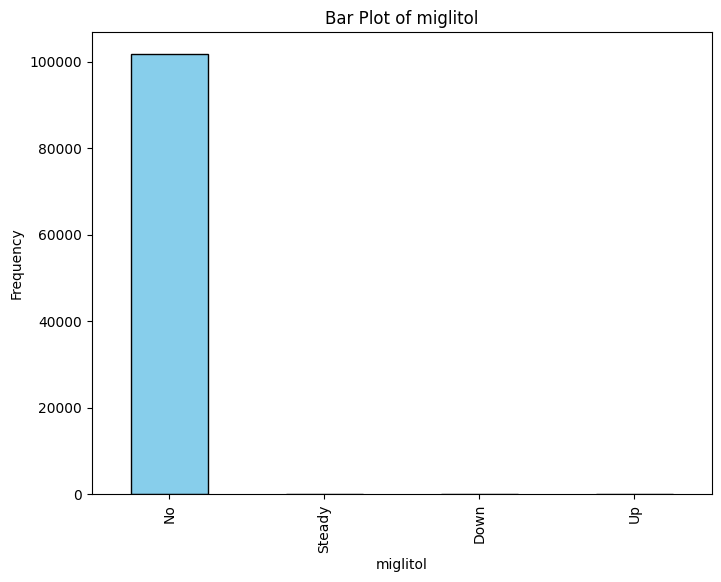

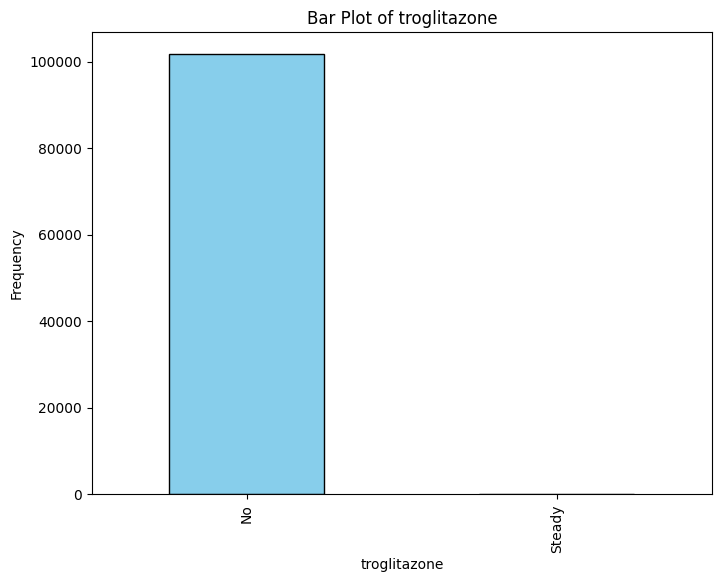

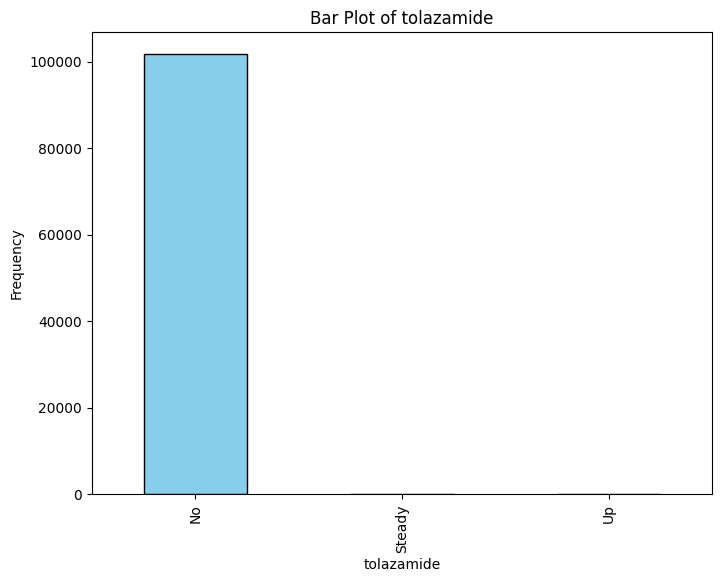

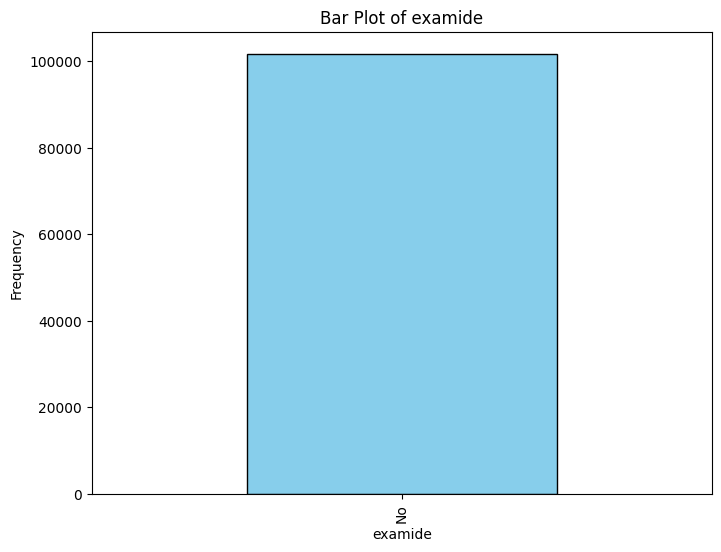

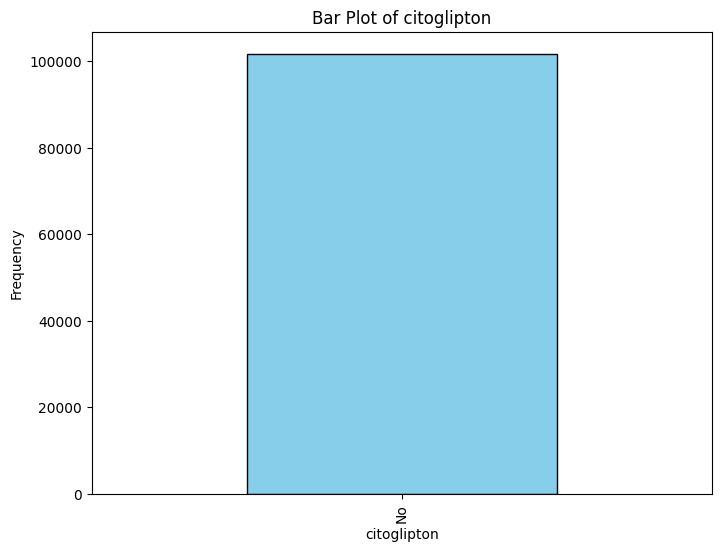

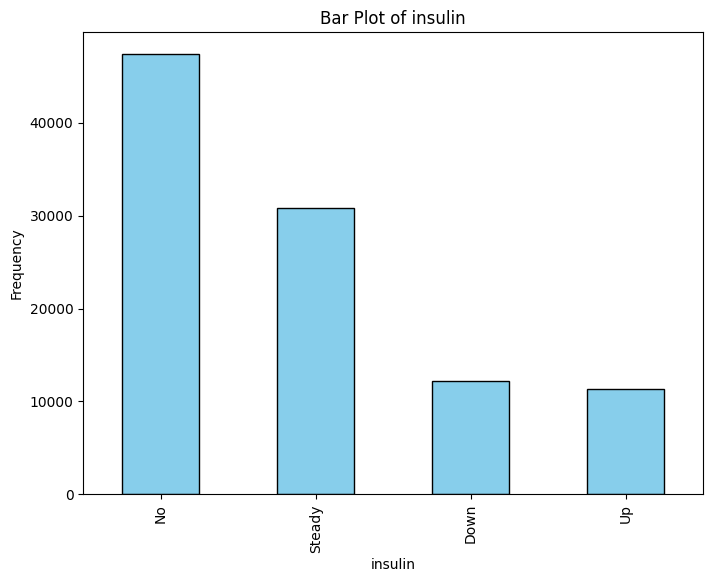

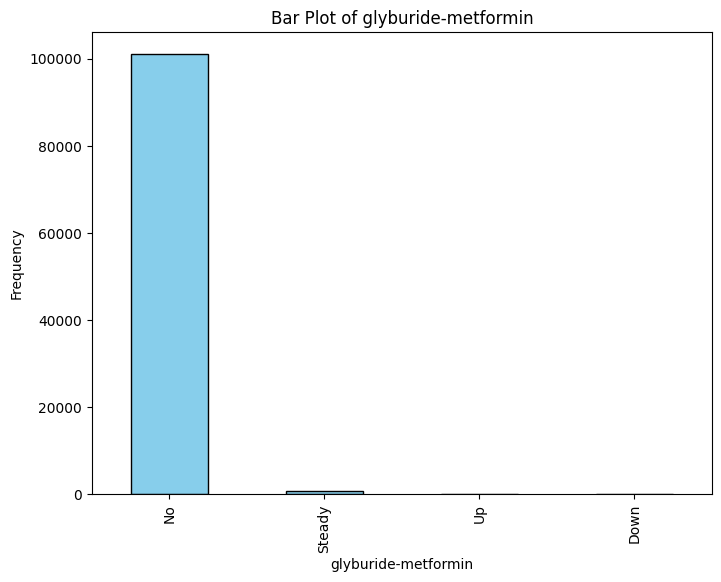

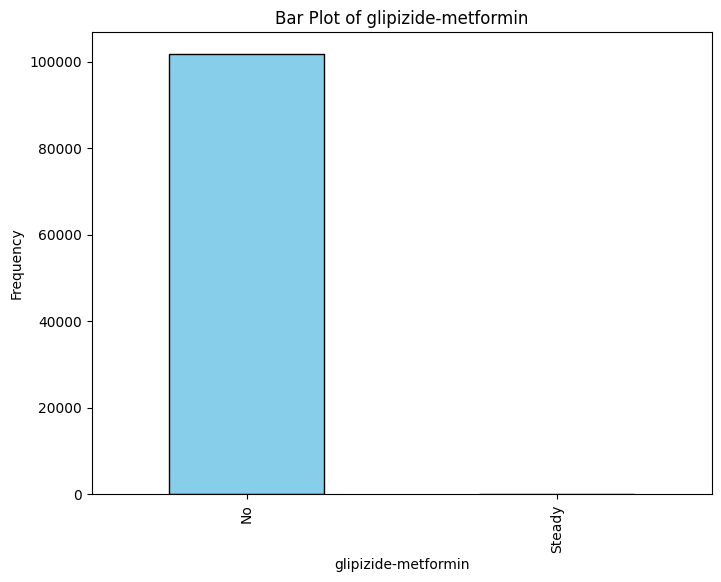

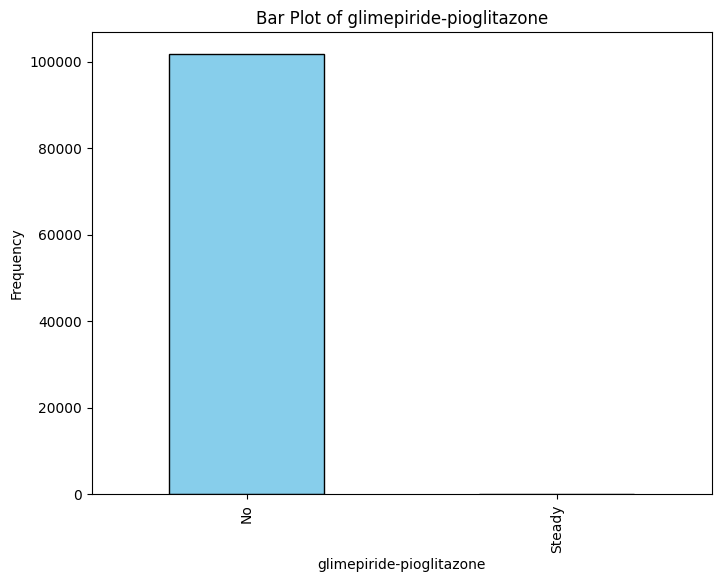

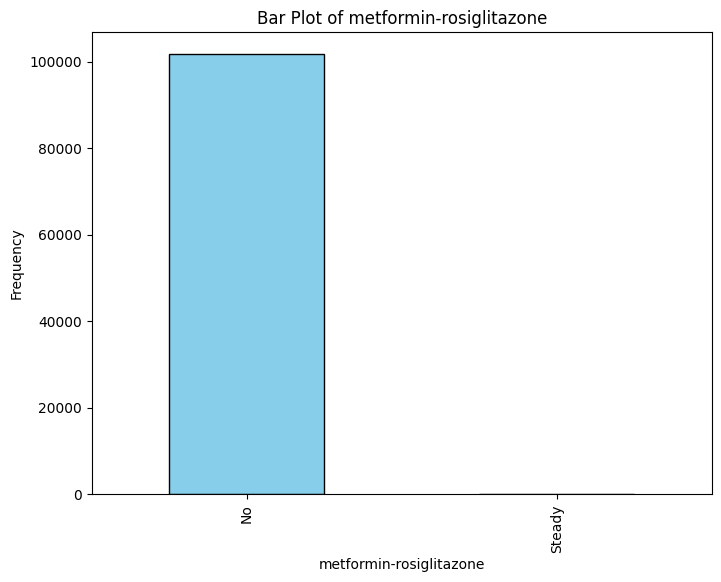

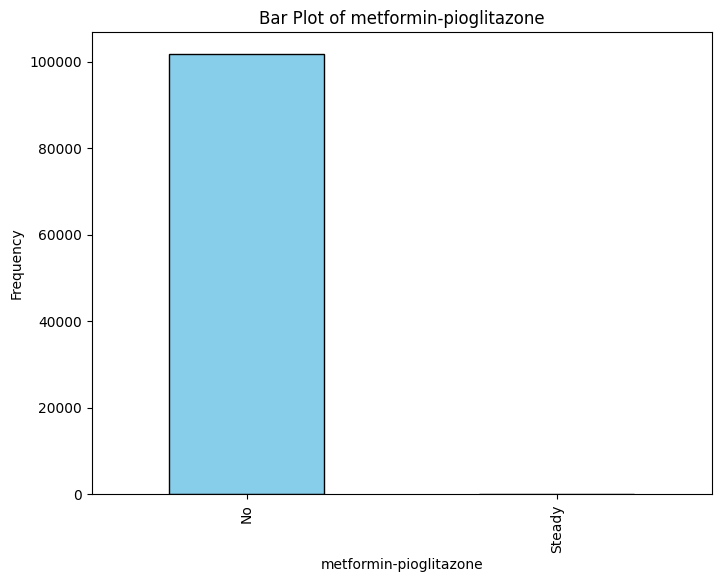

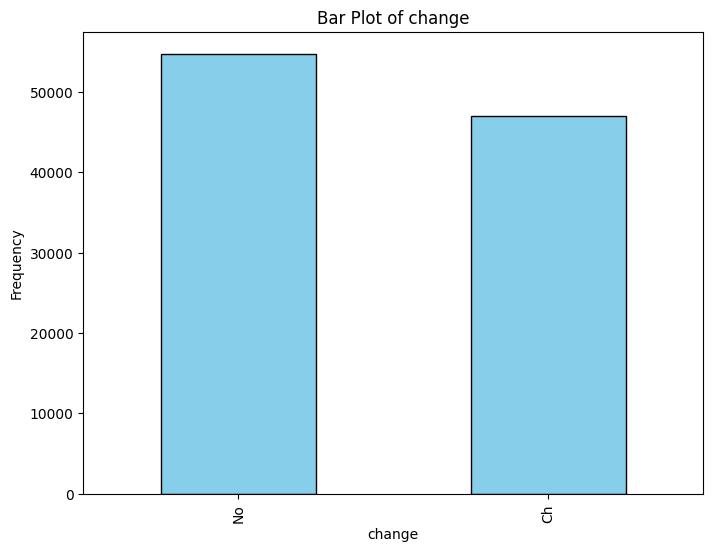

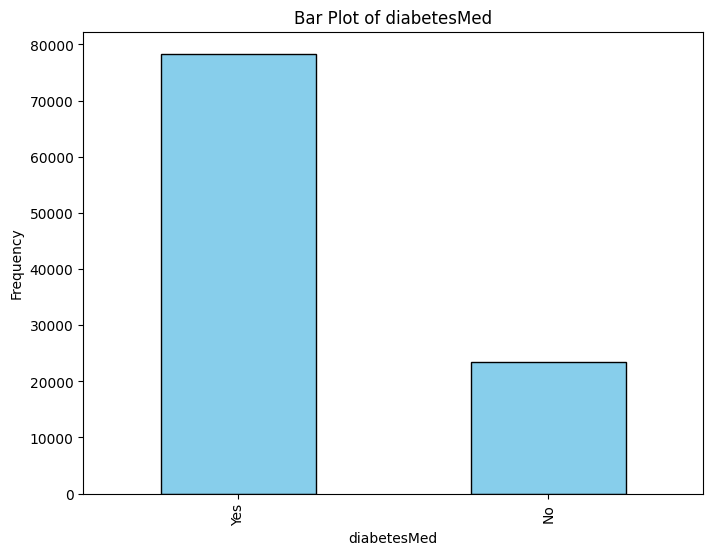

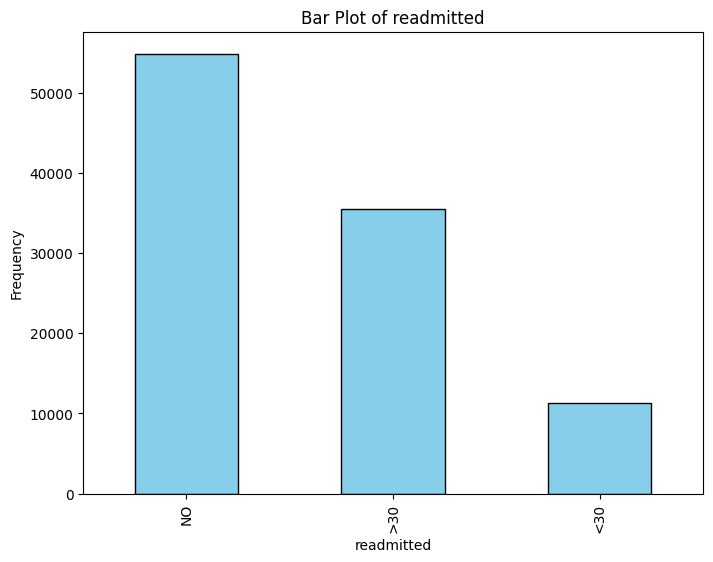

In [63]:
for col in df.columns:
    if df[col].dtype == "object": 
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title(f"Bar Plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(False)
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        df[col].hist(color="skyblue", bins=20, edgecolor="black") # also here shits are not discrete should be range
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(False)
        plt.show()

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col]) # some columns like age should be ordinal encoded

In [66]:
X = df

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=10) # the variance each get is toooooooo fucking low when using .95 here there was 38 features
X = pca.fit_transform(X)

In [67]:
pca.explained_variance_ratio_

array([0.0566184 , 0.04489925, 0.04254785, 0.03493741, 0.03024817,
       0.02837941, 0.02545267, 0.02472236, 0.02419501, 0.02399426])

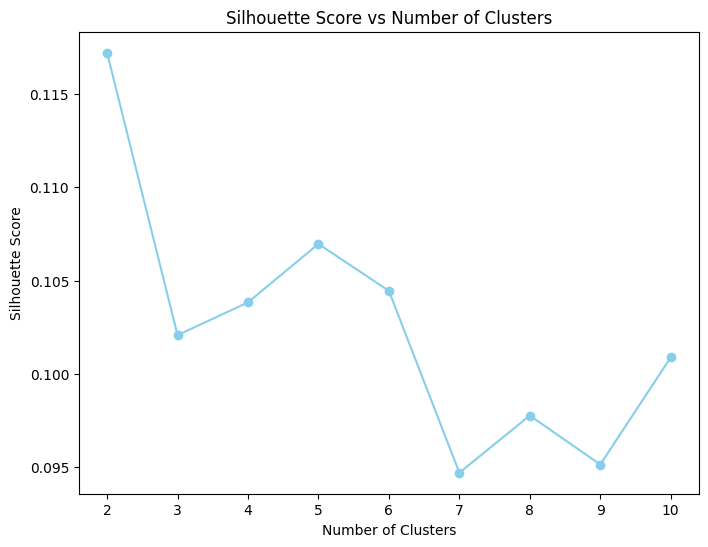

In [68]:
silhouette_scores = []

for n_clusters in range(2, 11): # this takes a lot of time 
                                # (4 minute and 32 seconds last time i checked on gpu)
    with config_context(target_offload="gpu:0"):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, color="skyblue", marker="o")
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(False)
plt.show()

In [69]:
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2 # +2 because range starts from 2

In [70]:
print(f"Best Silhouette Score: {max(silhouette_scores)}")

Best Silhouette Score: 0.11722415571257853


In [71]:
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(X)

KMeans(n_clusters=2)

In [72]:
with open("kmeans.pkl", "wb") as f: # move this names to a var later
    pickle.dump(kmeans, f)

In [73]:
with open("kmeans.pkl", "rb") as f:
    kmeans = pickle.load(f)

In [ ]:
silhouette_scores = []

for eps in np.arange(0.1, 1.1, 0.1): # this also takes hell of a time
    for min_samples in range(2, 11):
        with config_context(target_offload="gpu:0"):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(X)
            if len(set(dbscan.labels_)) > 1:
                silhouette_scores.append((eps, min_samples, silhouette_score(X, dbscan.labels_)))
   
plt.figure(figsize=(8, 6))
plt.plot([x[2] for x in silhouette_scores], color="skyblue", marker="o")
plt.title("Silhouette Score vs Hyperparameters")
plt.xlabel("Index")
plt.ylabel("Silhouette Score")
plt.grid(False)
plt.show() # maybe use grid search here

In [ ]:
silhouette_scores = sorted(silhouette_scores, key=lambda x: x[2], reverse=True)

optimal_eps, optimal_min_samples, optimal_silhouette_score = silhouette_scores[0]

In [89]:
print(f"Best Silhouette Score: {optimal_silhouette_score}")

Best Silhouette Score: 0.1576872200690248


not good enough. not this not k-means.

In [85]:
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [87]:
with open("dbscan.pkl", "wb") as f:
    pickle.dump(dbscan, f)

In [88]:
with open("dbscan.pkl", "rb") as f:
    dbscan = pickle.load(f)

In [92]:
with open("../result/result.csv", "w") as f:
    kmeans_labels = kmeans.predict(X)
    dbscan_labels = dbscan.fit_predict(X)
    f.write("id_encounter,kmeans_label,dbscan_label\n")
    id_encounters = df["encounter_id"]
    for i in range(len(df)):
        f.write(f"{id_encounters[i]},{kmeans_labels[i]},{dbscan_labels[i]}\n")

TODO: Add visualization and shit